# Importing necessary libraries

In [3]:
import sys
import os

# Get the current notebook/script directory
notebook_dir = os.getcwd()

# Define the project root path
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))  

# Add the scripts folder to the Python path
src_path = os.path.join(project_root, 'scripts')
if src_path not in sys.path:
    sys.path.append(src_path)

# Import necessary modules
import pandas as pd
from data_loading import load_csv,load_yfinance_data  
from descriptive_statistic import dataset_summary,compute_basic_stats, count_unique_symbols
#from publisher_analysis import publisher_sentiment_analysis
from text_analysis import (
    sentiment_analysis_vader, sentiment_analysis_textblob, combined_sentiment,
    sentiment_by_stock, generate_wordcloud, analyze_ngrams,
    extract_topics_from_headlines, perform_ner, plot_sentiment_distribution
)
from time_series_analysis import (
    publication_frequency_analysis, stl_decomposition, 
    time_of_day_analysis, moving_average_analysis, weekday_analysis
)
from publisher_analysis import (
    top_publishers, email_domain_analysis, news_type_analysis,
    unique_publishers_over_time, publisher_domain_analysis
)
from technical_analysis import add_technical_indicators
#from financial_metrics import calculate_financial_metrics 
from data_visualization import plot_macd,plot_rsi,plot_stock_data_with_indicators

In [21]:

# Define file paths
analyst_ratings_path = r"C:\Users\HP\Desktop\week - 1\Data\raw_analyst_ratings\raw_analyst_ratings.csv"
yfinance_folder_path = r"C:\Users\HP\Desktop\week - 1\Data\yfinance_data"

# Load data
raw_analyst_ratings = load_csv(analyst_ratings_path)
yfinance_data = load_yfinance_data(yfinance_folder_path)

# Inspect Raw Analyst Ratings
print("\nRaw Analyst Ratings Info:")
print(raw_analyst_ratings.info())
print(raw_analyst_ratings.head())

# Inspect YFinance Data
print("\nYFinance Data Keys (Stocks):", list(yfinance_data.keys()))
if 'AAPL_historical_data' in yfinance_data:
    print("\nSample AAPL Data:")
    print(yfinance_data['AAPL_historical_data'].head())
    
    


Loaded data from C:\Users\HP\Desktop\week - 1\Data\raw_analyst_ratings\raw_analyst_ratings.csv. Shape: (1407328, 6)

Raw Analyst Ratings Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4

# EDA

## Descriptive Statistics

In [3]:
print("=== Dataset Summary ===")
print(dataset_summary(raw_analyst_ratings))

=== Dataset Summary ===
{'Total Rows': 1407328, 'Total Columns': 6, 'Missing Values': {'Unnamed: 0': 0, 'headline': 0, 'url': 0, 'publisher': 0, 'date': 0, 'stock': 0}, 'Data Types': {'Unnamed: 0': dtype('int64'), 'headline': dtype('O'), 'url': dtype('O'), 'publisher': dtype('O'), 'date': dtype('O'), 'stock': dtype('O')}}


In [4]:
# Headline Statistics
print("\n=== Headline Statistics ===")
print(compute_basic_stats(raw_analyst_ratings))


=== Headline Statistics ===
{'median': np.float64(64.0), 'mode': np.int64(47), 'trimmed_mean': np.float64(70.84852926965142)}


In [5]:
# Unique Stock Symbols
print("\n=== Stock Symbol Analysis ===")
print(count_unique_symbols(raw_analyst_ratings))


=== Stock Symbol Analysis ===
stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
        ... 
PLW        1
RFT        1
WIP        1
ONEQ       1
BHL        1
Name: count, Length: 6204, dtype: int64


In [12]:
raw_analyst_ratings.describe(include=[object])

,headline,url,publisher,date,stock
count,1407328,1407328,1407328,1407328,1407328
unique,845770,883429,1034,39957,6204
top,Benzinga's Top Upgrades,https://www.benzinga.com/news/20/03/15538835/s...,Paul Quintaro,2020-03-12 00:00:00,MRK
freq,5449,1704,228373,1766,3333


Let's drop Unnamed: 0 column

In [6]:
 raw_analyst_ratings = raw_analyst_ratings.drop(columns=['Unnamed: 0'])


In [8]:
print("DataFrame Info:")
raw_analyst_ratings.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   headline   1407328 non-null  object
 1   url        1407328 non-null  object
 2   publisher  1407328 non-null  object
 3   date       1407328 non-null  object
 4   stock      1407328 non-null  object
dtypes: object(5)
memory usage: 53.7+ MB


In [9]:
raw_analyst_ratings.head(10)

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A
6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A
7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A
8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A
9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A


## Text Analysi:

In [11]:
 # Calculate basic statistics for headline length
raw_analyst_ratings['headline_length'] = raw_analyst_ratings['headline'].apply(len)
print("\nHeadline Length Statistics:")
print(raw_analyst_ratings['headline_length'].describe())



Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


### Sentiment Analysis

In [3]:
raw_analyst_ratings = sentiment_analysis_vader(raw_analyst_ratings)

In [4]:
# sentiment analysis using text blob
raw_analyst_ratings = sentiment_analysis_textblob(raw_analyst_ratings)

In [6]:
# Sentiment analysis using both vader and textblob
raw_analyst_ratings = combined_sentiment(raw_analyst_ratings)

In [7]:
raw_analyst_ratings

,Unnamed: 0,headline,url,publisher,date,stock,vader_sentiment,textblob_sentiment,combined_sentiment,sentiment_category
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.0000,0.00,0.00000,Neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.0000,0.00,0.00000,Neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.0000,0.00,0.00000,Neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.0000,0.00,0.00000,Neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.2960,0.00,0.14800,Neutral
...,...,...,...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,0.2023,0.15,0.17615,Neutral
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,-0.3818,0.15,-0.11590,Neutral
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,0.0000,0.00,0.00000,Neutral
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,0.0000,0.00,0.00000,Neutral


#### word Cloud

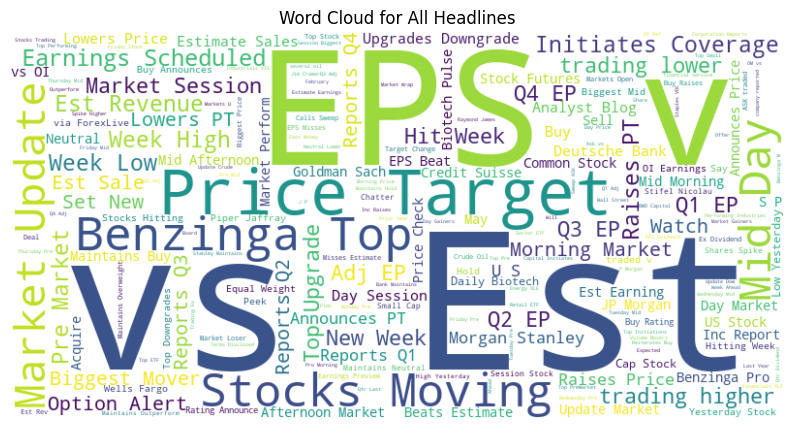

In [8]:
# Generate Word Cloud
generate_wordcloud(raw_analyst_ratings)

####Significant Topic

In [9]:
# Extract Significant Topics
print("\n=== Extracting Significant Topics ===")
extract_topics_from_headlines(raw_analyst_ratings, top_n=10)


=== Extracting Significant Topics ===
=== Extracted Topics (Top 10 Significant Headlines) ===
                                             headline stock
0             Stocks That Hit 52-Week Highs On Friday     A
1          Stocks That Hit 52-Week Highs On Wednesday     A
4   B of A Securities Maintains Neutral on Agilent...     A
5   CFRA Maintains Hold on Agilent Technologies, L...     A
6   UBS Maintains Neutral on Agilent Technologies,...     A
8   Wells Fargo Maintains Overweight on Agilent Te...     A
9          10 Biggest Price Target Changes For Friday     A
11  SVB Leerink Maintains Outperform on Agilent Te...     A
16  Agilent Technologies Receives FDA Approval for...     A
22  UBS Maintains Neutral on Agilent Technologies,...     A


,Unnamed: 0,headline,url,publisher,date,stock,vader_sentiment,textblob_sentiment,combined_sentiment,sentiment_category
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.000,0.0,0.000,Neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.000,0.0,0.000,Neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.296,0.0,0.148,Neutral
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A,-0.128,0.0,-0.064,Neutral
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A,0.000,0.0,0.000,Neutral
...,...,...,...,...,...,...,...,...,...,...
1407192,1413713,Jefferies Increases Price Target on Zumiez (ZUMZ),https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffJ,2010-12-02 00:00:00,ZUMZ,0.000,0.0,0.000,Neutral
1407197,1413718,Piper Jaffray Raises Price Target on Gordmans ...,https://www.benzinga.com/analyst-ratings/analy...,Michael J. Zerinskas,2010-12-01 00:00:00,ZUMZ,0.000,0.0,0.000,Neutral
1407198,1413719,Piper Jaffray Raises Price Target on Zumiez (Z...,https://www.benzinga.com/analyst-ratings/analy...,Michael J. Zerinskas,2010-12-01 00:00:00,ZUMZ,0.000,0.0,0.000,Neutral
1407199,1413720,Piper Jaffray Raises Price Target on Zumiez,https://www.benzinga.com/analyst-ratings/price...,Benzinga Staff,2010-12-01 00:00:00,ZUMZ,0.000,0.0,0.000,Neutral


c:\Users\HP\Desktop\financial-news-analysis\scripts\text_analysis.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(values), y=list(ngrams), palette="viridis")


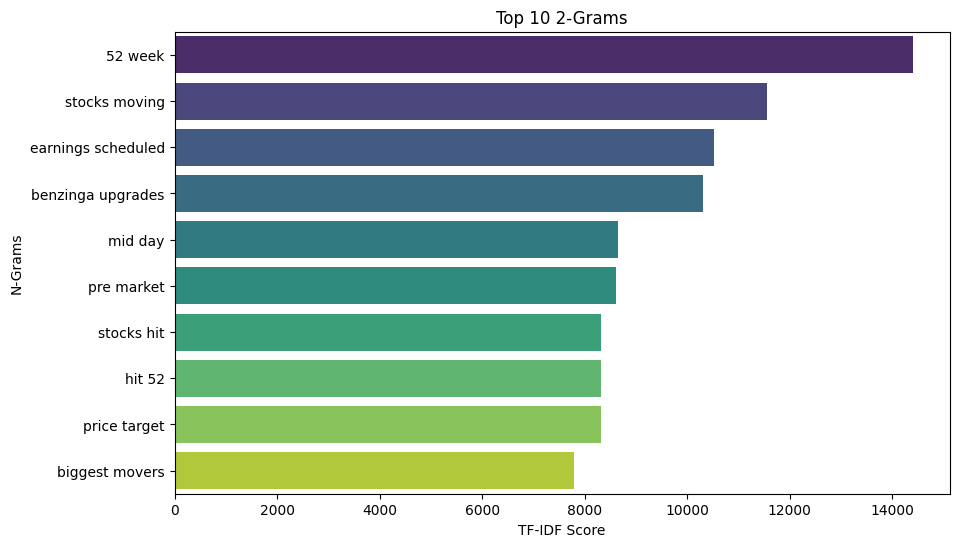

[('52 week', 14399.801854147483),
 ('stocks moving', 11561.875769761393),
 ('earnings scheduled', 10524.35535127614),
 ('benzinga upgrades', 10306.258129409904),
 ('mid day', 8647.81647847328),
 ('pre market', 8604.58752917077),
 ('stocks hit', 8323.043528579918),
 ('hit 52', 8316.53922906208),
 ('price target', 8312.658608788748),
 ('biggest movers', 7786.199328108842)]

In [10]:

# Analyze Bi-grams
analyze_ngrams(raw_analyst_ratings, n=2, top_n=10)

In [12]:
# # Perform NER
# print("\n=== Named Entity Recognition ===")
# perform_ner(raw_analyst_ratings)

### Publisher Analysis

#### Identify unique publishers

In [16]:

unique_publishers = raw_analyst_ratings['publisher'].nunique()
print(f"\nNumber of Unique Publishers: {unique_publishers}")


Number of Unique Publishers: 1034


#### Analyze top publishers

=== Top Publishers ===


c:\Users\HP\Desktop\financial-news-analysis\scripts\publisher_analysis.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')


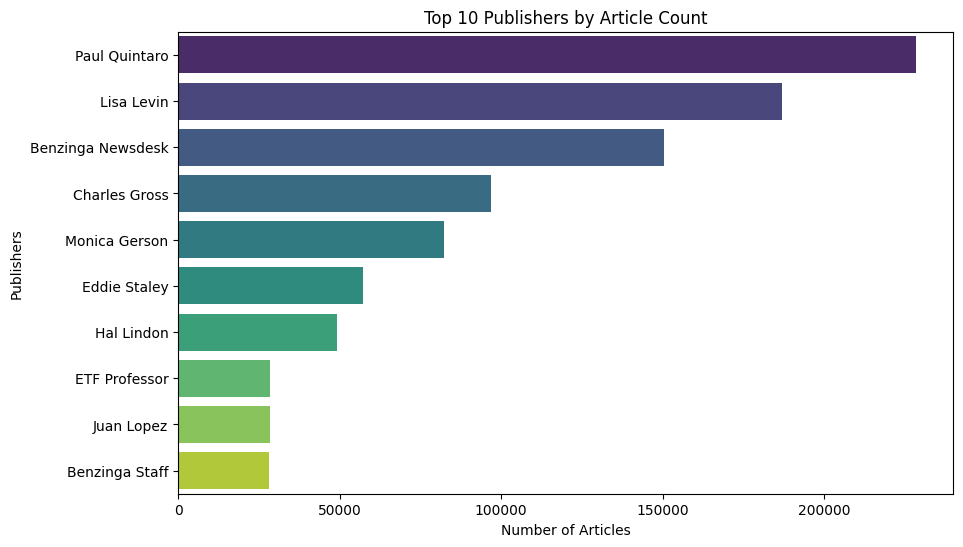

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


In [10]:
print("=== Top Publishers ===")
print(top_publishers(raw_analyst_ratings))

#### Analyze email domains in publisher names


=== Email Domain Analysis ===


c:\Users\HP\Desktop\financial-news-analysis\scripts\publisher_analysis.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=domain_counts.head(10).values, y=domain_counts.head(10).index, palette='coolwarm')


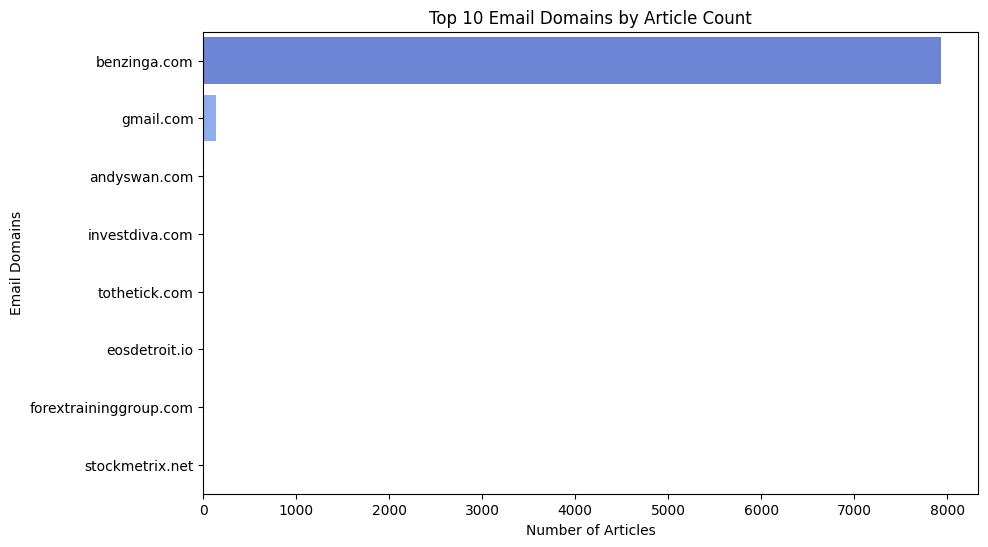

publisher
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


In [11]:
print("\n=== Email Domain Analysis ===")
print(email_domain_analysis(raw_analyst_ratings))

#### Analyze news types reported by publishers


=== News Type Analysis ===


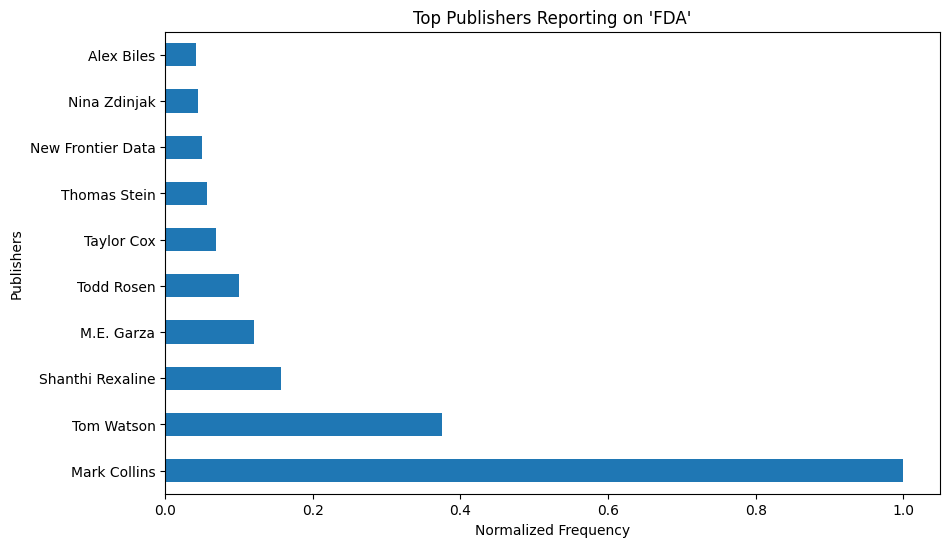

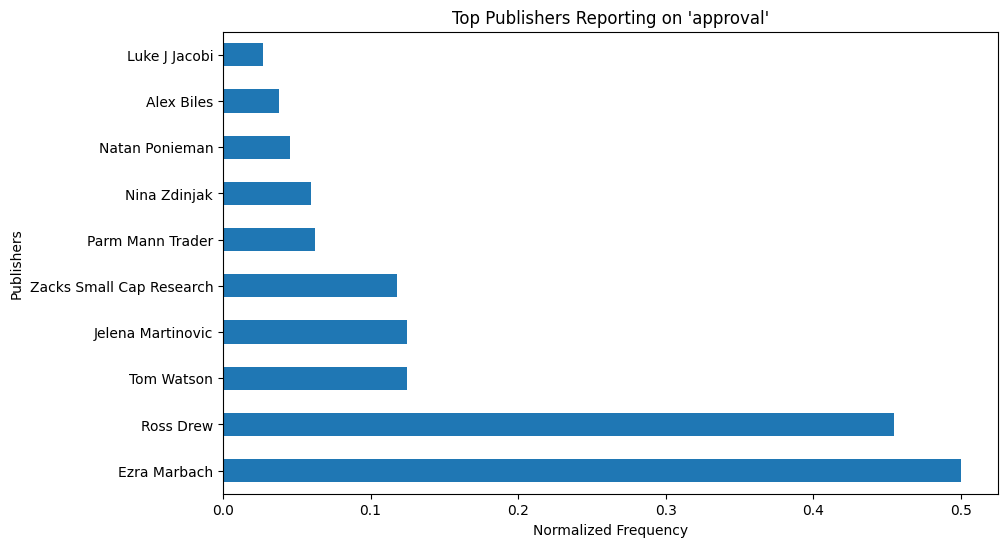

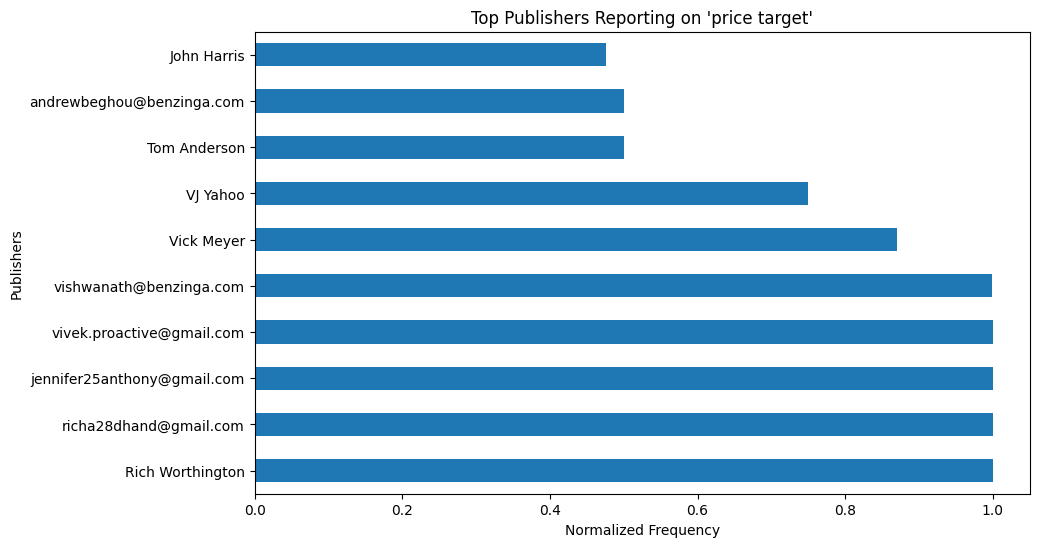

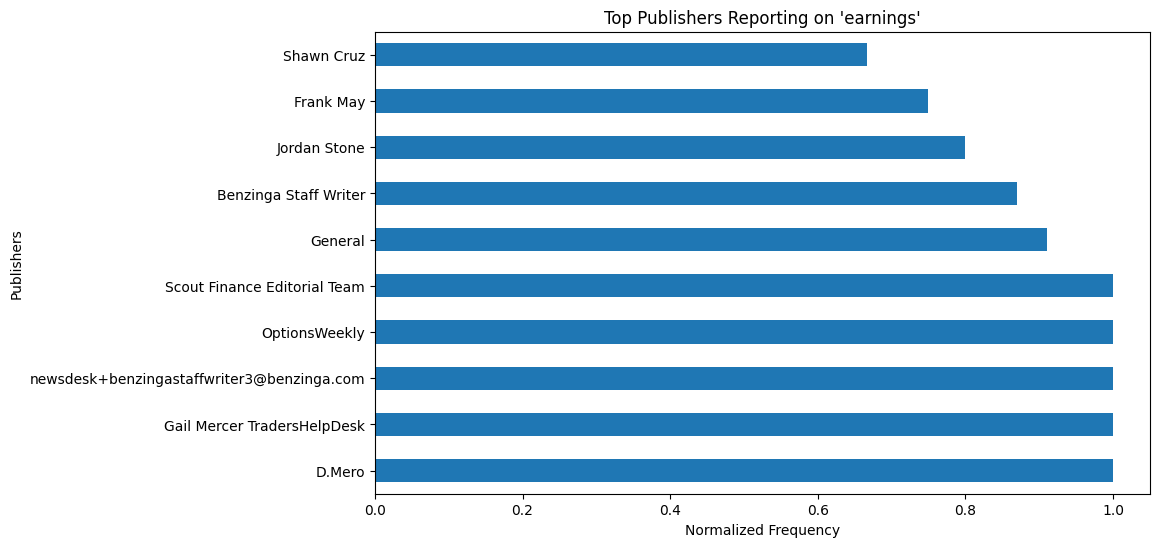

In [12]:
print("\n=== News Type Analysis ===")
keyword_list = ['FDA', 'approval', 'price target', 'earnings']
news_type_df = news_type_analysis(raw_analyst_ratings, keyword_list=keyword_list)

#### Analyze unique publishers over time


=== Unique Publishers Over Time ===


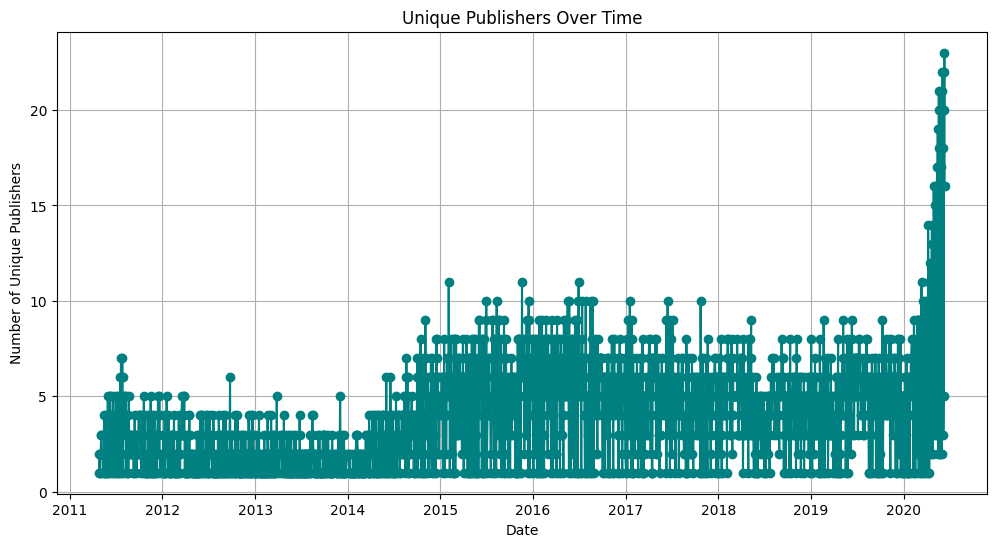

date
2011-04-27     1
2011-04-28     2
2011-04-29     2
2011-04-30     1
2011-05-01     1
              ..
2020-06-07     5
2020-06-08    22
2020-06-09    20
2020-06-10    23
2020-06-11    16
Name: publisher, Length: 2528, dtype: int64


In [14]:
print("\n=== Unique Publishers Over Time ===")
print(unique_publishers_over_time(raw_analyst_ratings))

####  Analyze publisher domains


=== Publisher Domain Analysis ===


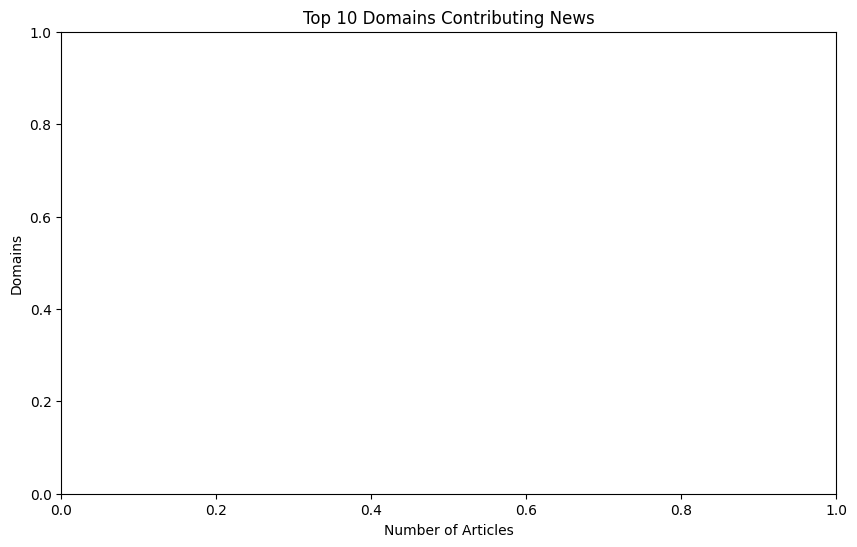

Series([], Name: count, dtype: int64)


In [15]:
print("\n=== Publisher Domain Analysis ===")
print(publisher_domain_analysis(raw_analyst_ratings))

## Text Analysis (Sentiment Analysis)

we perform `sentiment analysis` on financial news headlines using **VADER (Valance Aware Dictionary anssEntiment Reasoner)** sentiment analysis tool.

## Time Series Analysis

In [37]:
print(raw_analyst_ratings['date'].head(20))


0     2020-06-05 10:30:54-04:00
1     2020-06-03 10:45:20-04:00
2     2020-05-26 04:30:07-04:00
3     2020-05-22 12:45:06-04:00
4     2020-05-22 11:38:59-04:00
5     2020-05-22 11:23:25-04:00
6     2020-05-22 09:36:20-04:00
7     2020-05-22 09:07:04-04:00
8     2020-05-22 08:37:59-04:00
9     2020-05-22 08:06:17-04:00
10          2020-05-22 00:00:00
11          2020-05-22 00:00:00
12          2020-05-21 00:00:00
13          2020-05-21 00:00:00
14          2020-05-21 00:00:00
15          2020-05-21 00:00:00
16          2020-05-18 00:00:00
17          2020-05-16 00:00:00
18          2020-05-15 00:00:00
19          2020-05-08 00:00:00
Name: date, dtype: object


In [38]:
# Convert 'date' column to datetime format
raw_analyst_ratings['date'] = pd.to_datetime(
    raw_analyst_ratings['date'], 
    format="%Y-%m-%d %H:%M:%S", 
    errors="coerce"
)


In [39]:
invalid_dates = raw_analyst_ratings[raw_analyst_ratings['date'].isna()]
print(f"Number of invalid dates: {len(invalid_dates)}")


Number of invalid dates: 55987


In [40]:
# Display a sample of the rows with invalid dates
print("Sample of invalid dates:")
print(invalid_dates[['date']].head(20))


Sample of invalid dates:
     date
0     NaT
1     NaT
2     NaT
3     NaT
4     NaT
5     NaT
6     NaT
7     NaT
8     NaT
9     NaT
1433  NaT
1434  NaT
1435  NaT
1436  NaT
1437  NaT
1438  NaT
1439  NaT
1440  NaT
1441  NaT
1442  NaT


In [41]:
total_rows = raw_analyst_ratings.shape[0]
invalid_dates_count = raw_analyst_ratings['date'].isna().sum()
invalid_date_percentage = (invalid_dates_count / total_rows) * 100

print(f"Total rows: {total_rows}")
print(f"Invalid dates: {invalid_dates_count} ({invalid_date_percentage:.2f}%)")


Total rows: 1407328
Invalid dates: 55987 (3.98%)


In [42]:
# Drop rows with NaT values in the 'date' column
raw_analyst_ratings = raw_analyst_ratings.dropna(subset=['date'])

# Verify the new shape of the dataset
print(f"Dataset after dropping invalid dates: {raw_analyst_ratings.shape}")


Dataset after dropping invalid dates: (1351341, 8)


In [43]:
invalid_dates = raw_analyst_ratings[raw_analyst_ratings['date'].isna()]
print(f"Number of invalid dates: {len(invalid_dates)}")


Number of invalid dates: 0


In [44]:
# Check for the earliest and latest publication dates
print("\nPublication Date Range:")
print(raw_analyst_ratings['date'].min(), "to", raw_analyst_ratings['date'].max())


Publication Date Range:
2009-02-14 00:00:00 to 2020-06-03 00:00:00


In [45]:
# Count the number of articles published per day
articles_per_day = raw_analyst_ratings.groupby(raw_analyst_ratings['date'].dt.date).size()
print("\nArticles Per Day:")
print(articles_per_day.head())


Articles Per Day:
date
2009-02-14    1
2009-04-27    2
2009-04-29    1
2009-05-22    1
2009-05-27    6
dtype: int64


In [46]:
# Identify the days with the highest number of publications
print("\nTop 5 Dates with the Most Articles:")
print(articles_per_day.nlargest(5))


Top 5 Dates with the Most Articles:
date
2020-03-12    1766
2020-02-27    1292
2020-02-28    1239
2019-08-01    1228
2020-03-06    1147
dtype: int64


#Yfinance analysis

In [23]:
import os
import pandas as pd

# Define the folder path where CSV files are stored
folder_path = "C:\\Users\\HP\\Desktop\\week-1\\Data\\yfinance_data"

# Initialize an empty dictionary to store data
yfinance_data = {}

# Load each CSV file into the dictionary
for file in os.listdir(folder_path):
    if file.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, file)
        # Use file name (without extension) as the key
        key_name = file.replace(".csv", "")
        yfinance_data[key_name] = pd.read_csv(file_path)

# Check the keys of the loaded dictionary
print("\nYFinance Data Keys (Stocks):", list(yfinance_data.keys()))

# Print a sample of AAPL data if available
if 'AAPL_historical_data' in yfinance_data:
    print("\nSample AAPL Data:")
    print(yfinance_data['AAPL_historical_data'].head())


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\HP\\Desktop\\week-1\\Data\\yfinance_data'